In [3]:
import pandas as pd
filepath = '../dat/bank-full.csv'
data = pd.read_csv(filepath, sep= ';') 

In [4]:
import shap
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#treatment exposure definition
import numpy as np
col         = 'duration'
conditions  = [ data[col] <=150, (data[col] >150)  ]
choices     = [ 0, 1 ]
    
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)

In [7]:
import numpy as np
col         = 'y'
conditions  = [ data[col] == 'no', (data[col] == 'yes' )  ]
choices     = [ 0, 1 ]
    
data["conversion"] = np.select(conditions, choices, default=np.nan)

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'treatment_tag', 'conversion'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  int64  
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   day            45211 non-null  int64  
 10  month          45211 non-null  object 
 11  duration       45211 non-null  int64  
 12  campaign       45211 non-null  int64  
 13  pdays          45211 non-null  int64  
 14  previous       45211 non-null  int64  
 15  poutcome       45211 non-null  object 
 16  y              45211 non-null  object 
 17  treatment_tag  45211 non-null  float64
 18  conver

### Exploratory Data Analysis 

In [10]:
data = data.dropna()

#### Categorical Data 

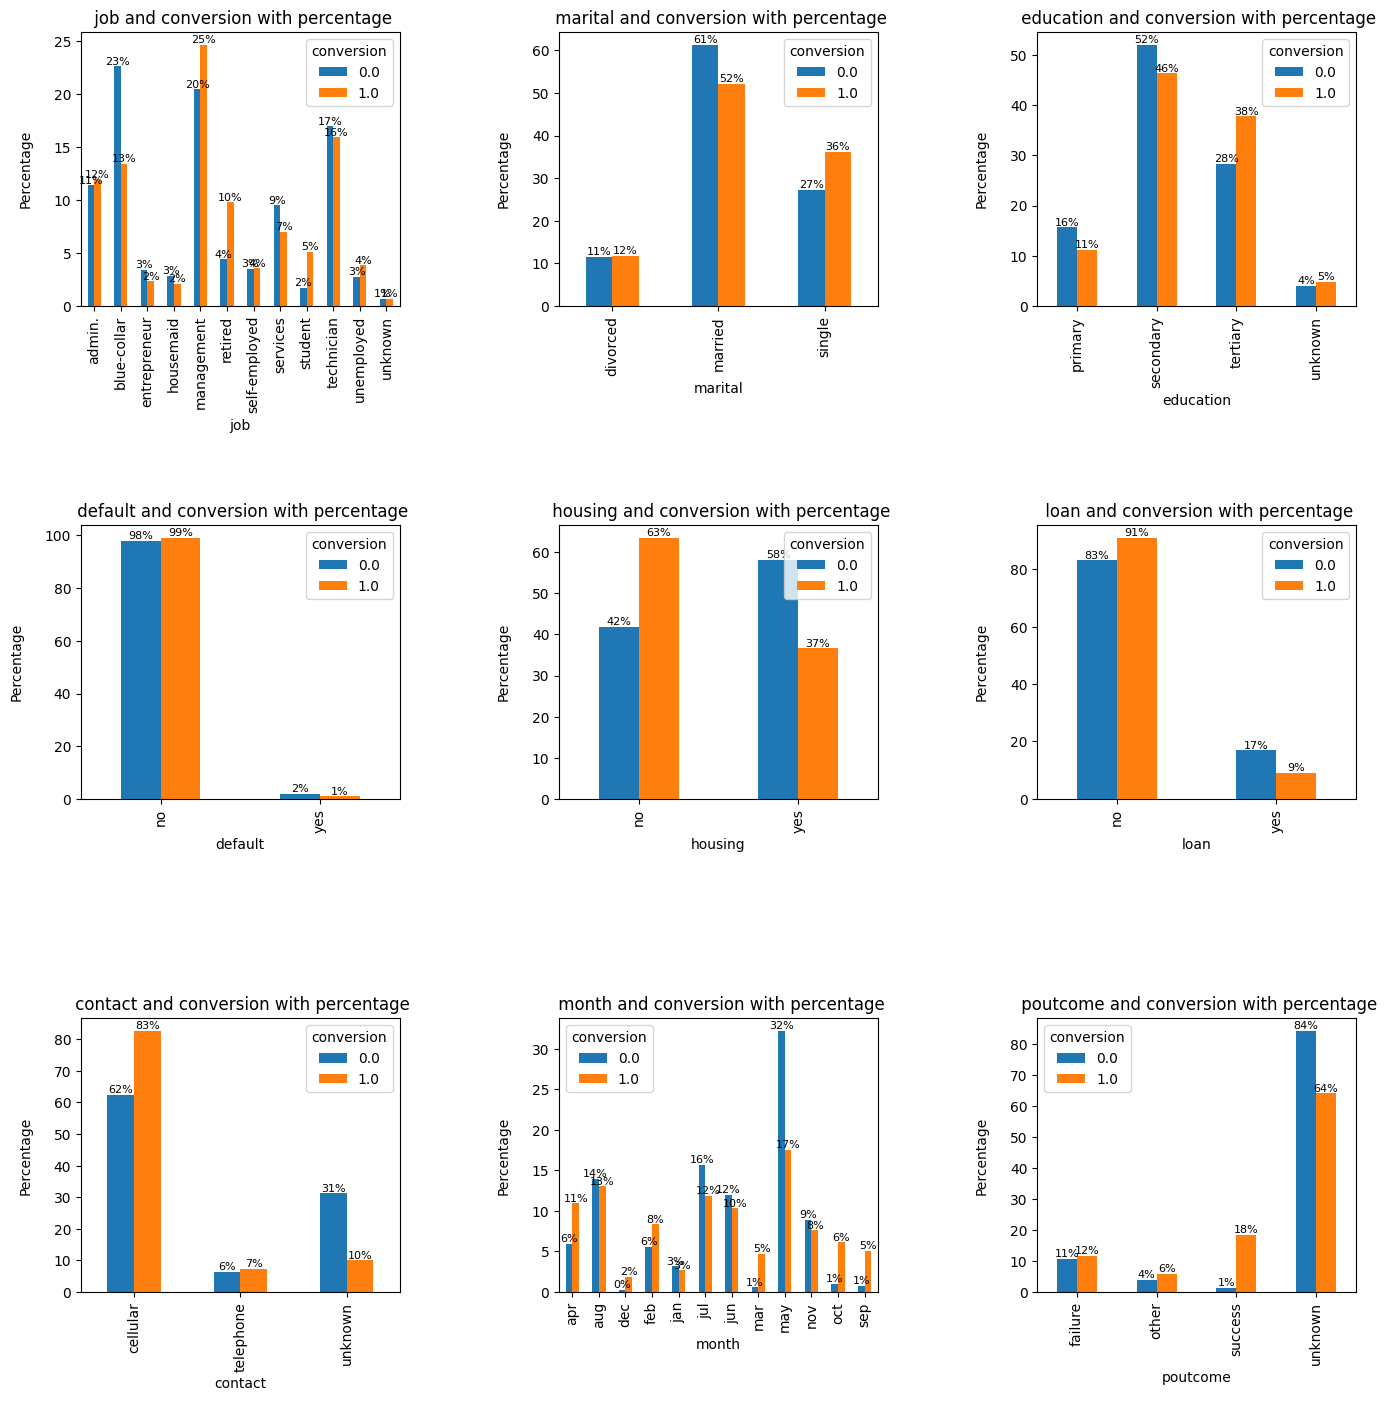

In [12]:
import matplotlib.pyplot as plt
# List of categorical columns to plot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Number of columns per row
num_cols = 3

# Calculate number of rows needed
num_rows = 3

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['conversion', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby('conversion')['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns='conversion', values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and conversion with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)

# Show the plot
plt.show()


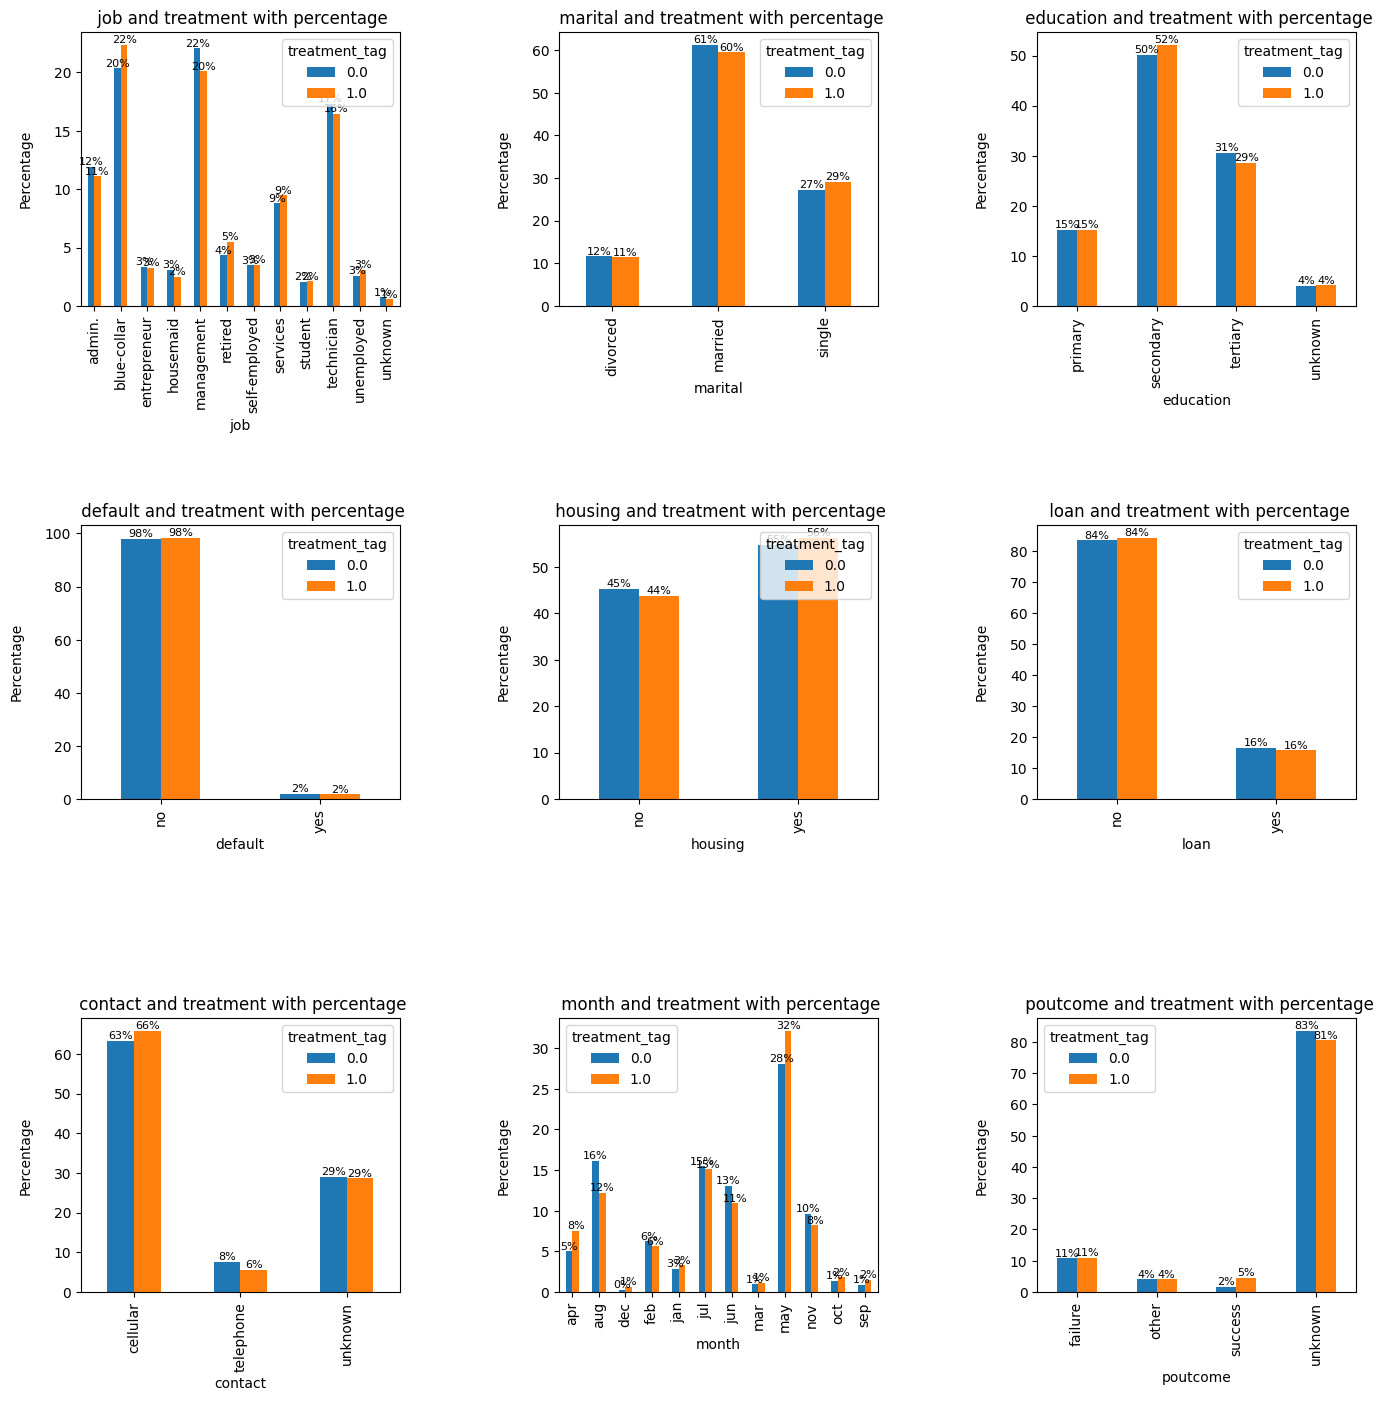

In [13]:
# List of categorical columns to plot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Number of columns per row
num_cols = 3

# Calculate number of rows needed
num_rows = 3

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['treatment_tag', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby('treatment_tag')['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns='treatment_tag', values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and treatment with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)

# Show the plot
plt.show()

In [14]:

# Define the bin edges for age and days columns
age_bins = [0, 25, 35, 50, 100]
days_bins = [0, 7, 14, 21, 31]

# Define the labels for age and days bins
age_labels = ['age_0-25', 'age_25-35', 'age_35-50', 'age_50-100']
days_labels = ['days_0-7', 'days_7-14', 'days_14-21', 'days_21-31']

# Bin the age and days columns and convert them to dummy variables
age_dummies = pd.get_dummies(pd.cut(data['age'], bins=age_bins, labels=age_labels))
days_dummies = pd.get_dummies(pd.cut(data['day'], bins=days_bins, labels=days_labels))

# Append the dummy variables to the original dataframe
data = pd.concat([data, age_dummies, days_dummies], axis=1)

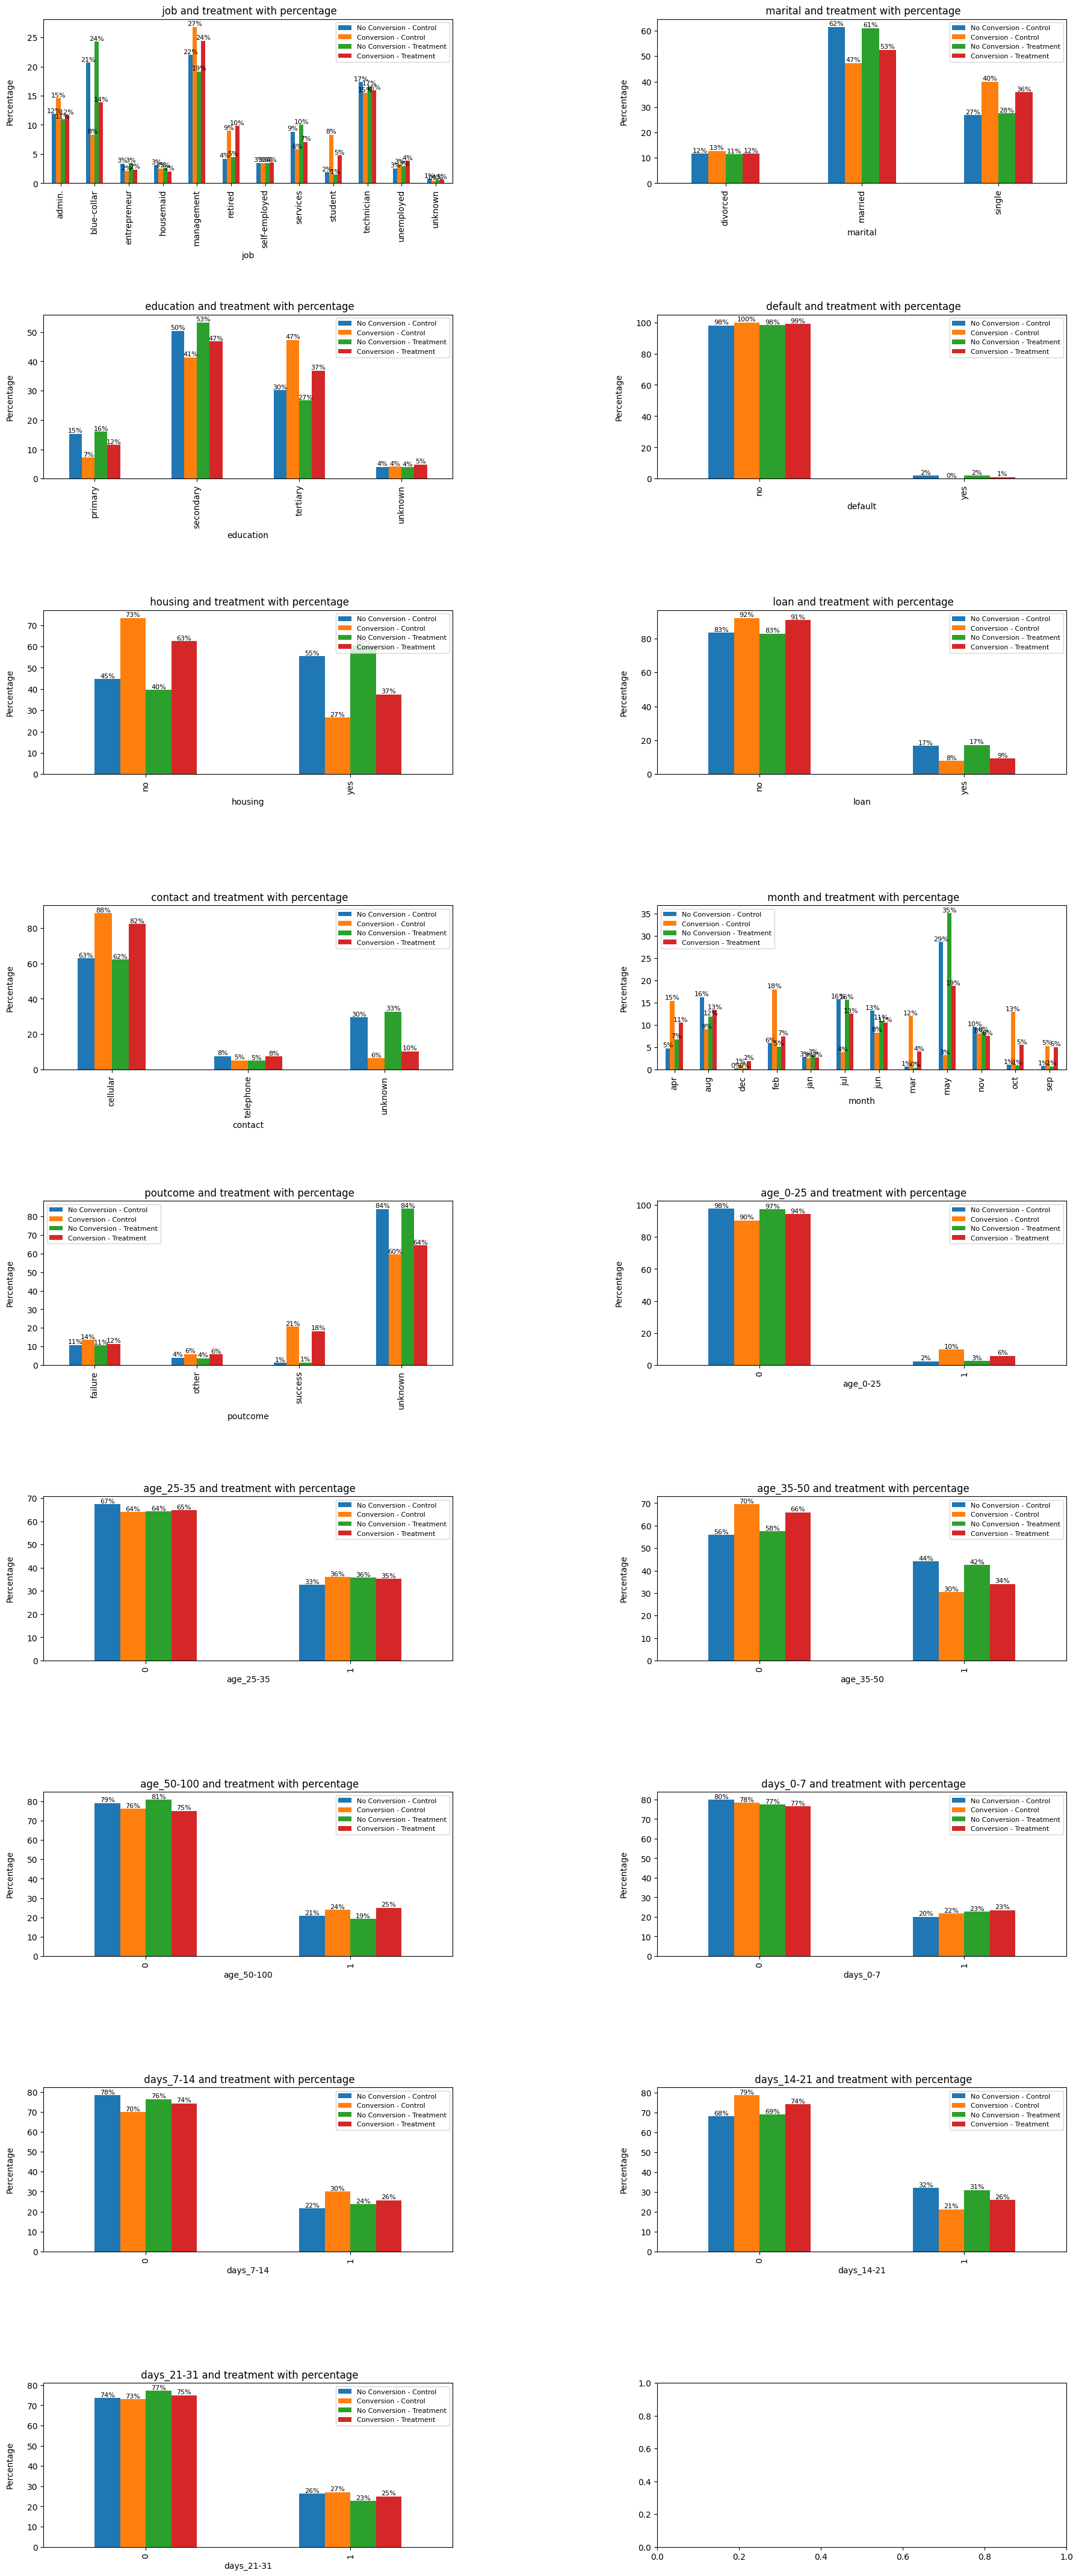

In [15]:
# List of categorical columns to plot
categorical_cols = categorical_cols + age_labels + days_labels

# Number of columns per row
num_cols = 2

# Calculate number of rows needed
num_rows = 9

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 50))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=1.92, bottom=1.08, left=1.10, right=1.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['treatment_tag', 'conversion', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby(['treatment_tag','conversion'] )['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns=['treatment_tag','conversion'], values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and treatment with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)
            
        # Set legend font size
        # Adjust the font size of the legend
        ax.legend(fontsize=8)

        # Rename the legend labels
        handles, labels = ax.get_legend_handles_labels()
        labels = ['No Conversion - Control', 'Conversion - Control', 'No Conversion - Treatment', 'Conversion - Treatment']
        ax.legend(handles, labels, fontsize=8)

# Show the plot
plt.show()

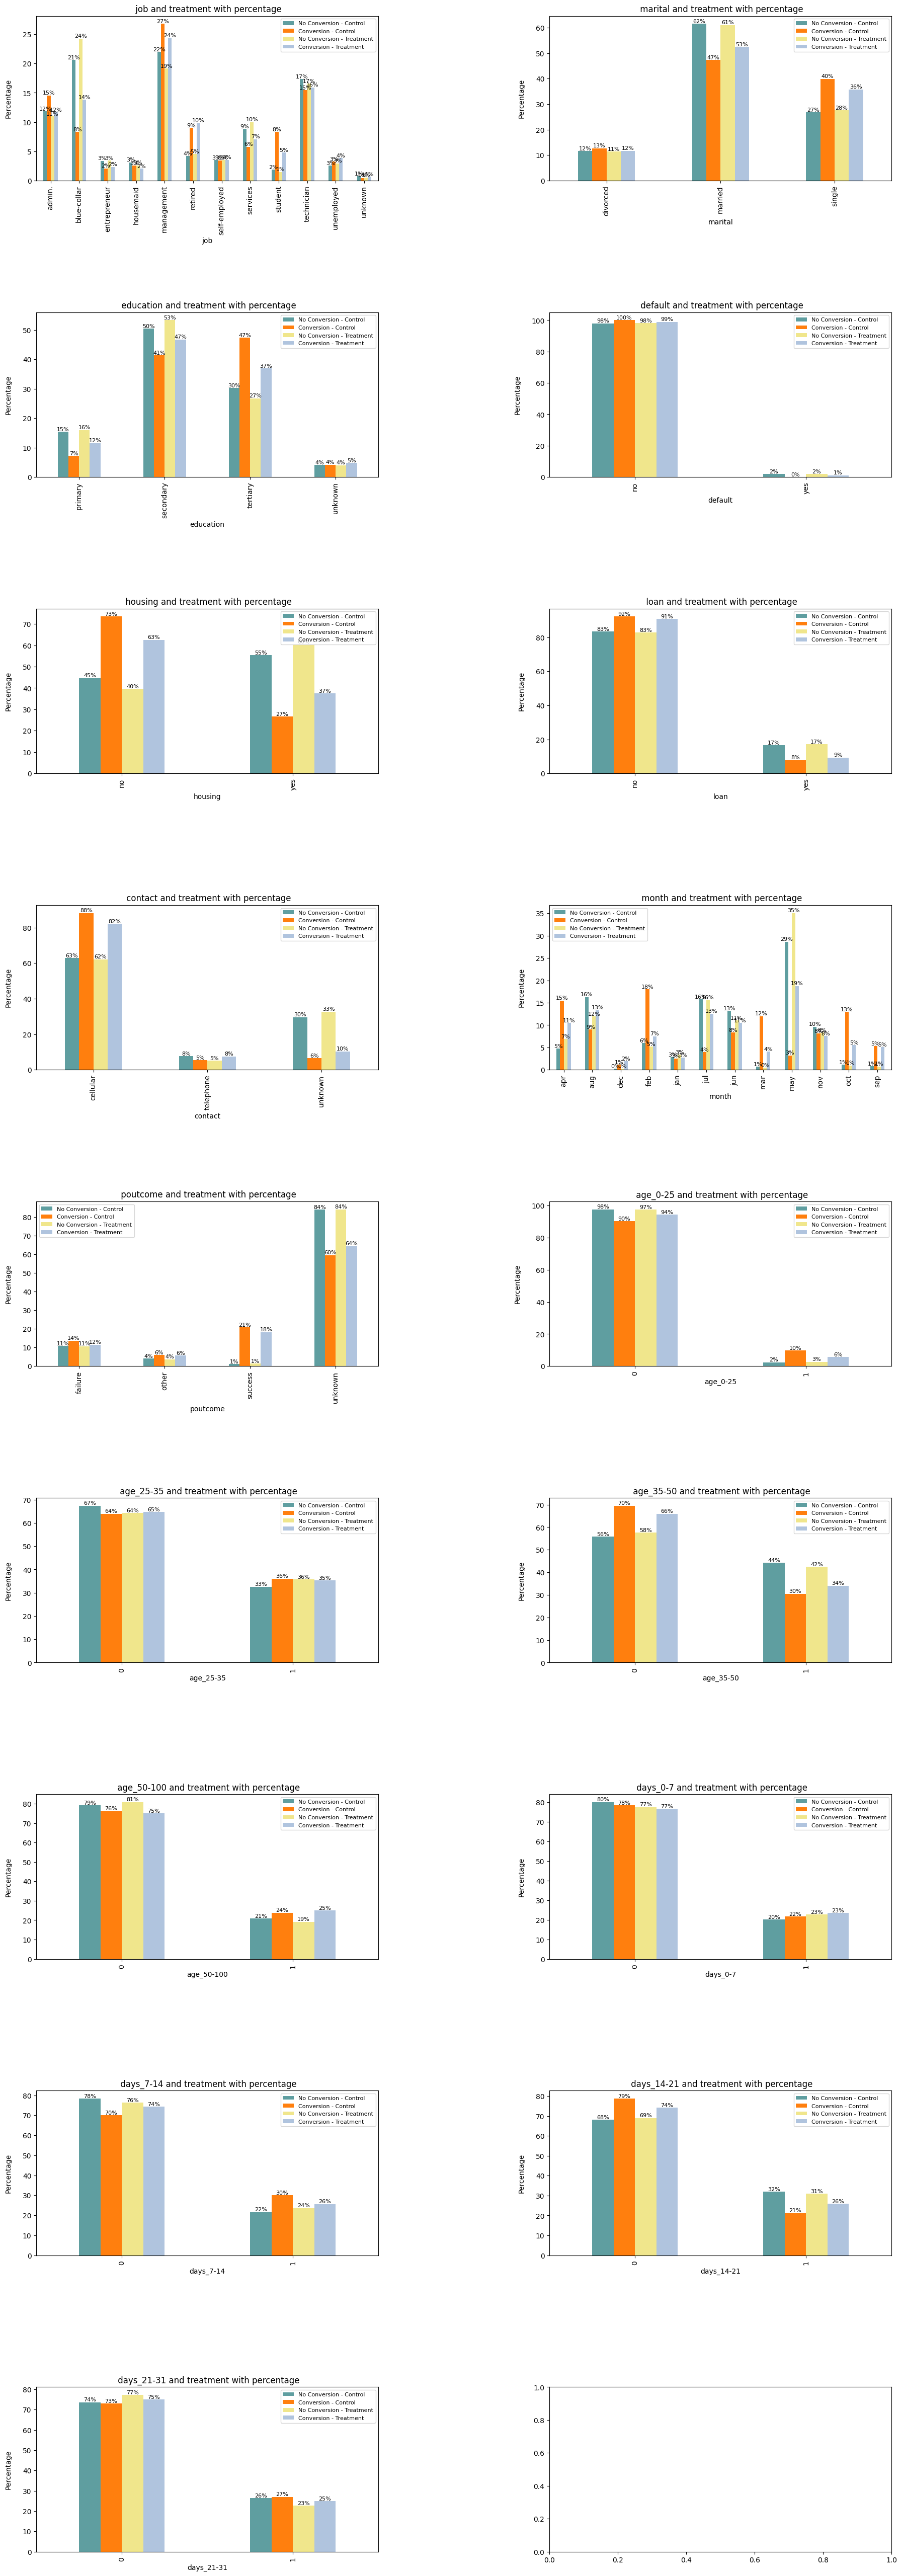

In [16]:
# List of categorical columns to plot
categorical_cols = categorical_cols

# Number of columns per row
num_cols = 2

# Calculate number of rows needed
num_rows = (len(categorical_cols) + 1) // num_cols

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 60))

# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['treatment_tag', 'conversion', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby(['treatment_tag','conversion'] )['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns=['treatment_tag','conversion'], values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx], color=['#5f9ea0', '#ff7f0e', '#f0e68c', '#b0c4de'])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and treatment with percentage', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Percentage', labelpad=15, fontsize=10)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)
            
        # Set legend font size
        ax.legend(fontsize=8)

        # Rename the legend labels
        handles, labels = ax.get_legend_handles_labels()
        labels = ['No Conversion - Control', 'Conversion - Control', 'No Conversion - Treatment', 'Conversion - Treatment']
        ax.legend(handles, labels, fontsize=8)

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=1.92, bottom=1.08, left=0.10, right=0.95, hspace=0.8, wspace=0.5)

# Show the plot
plt.show()


#### Numerical Analysis 

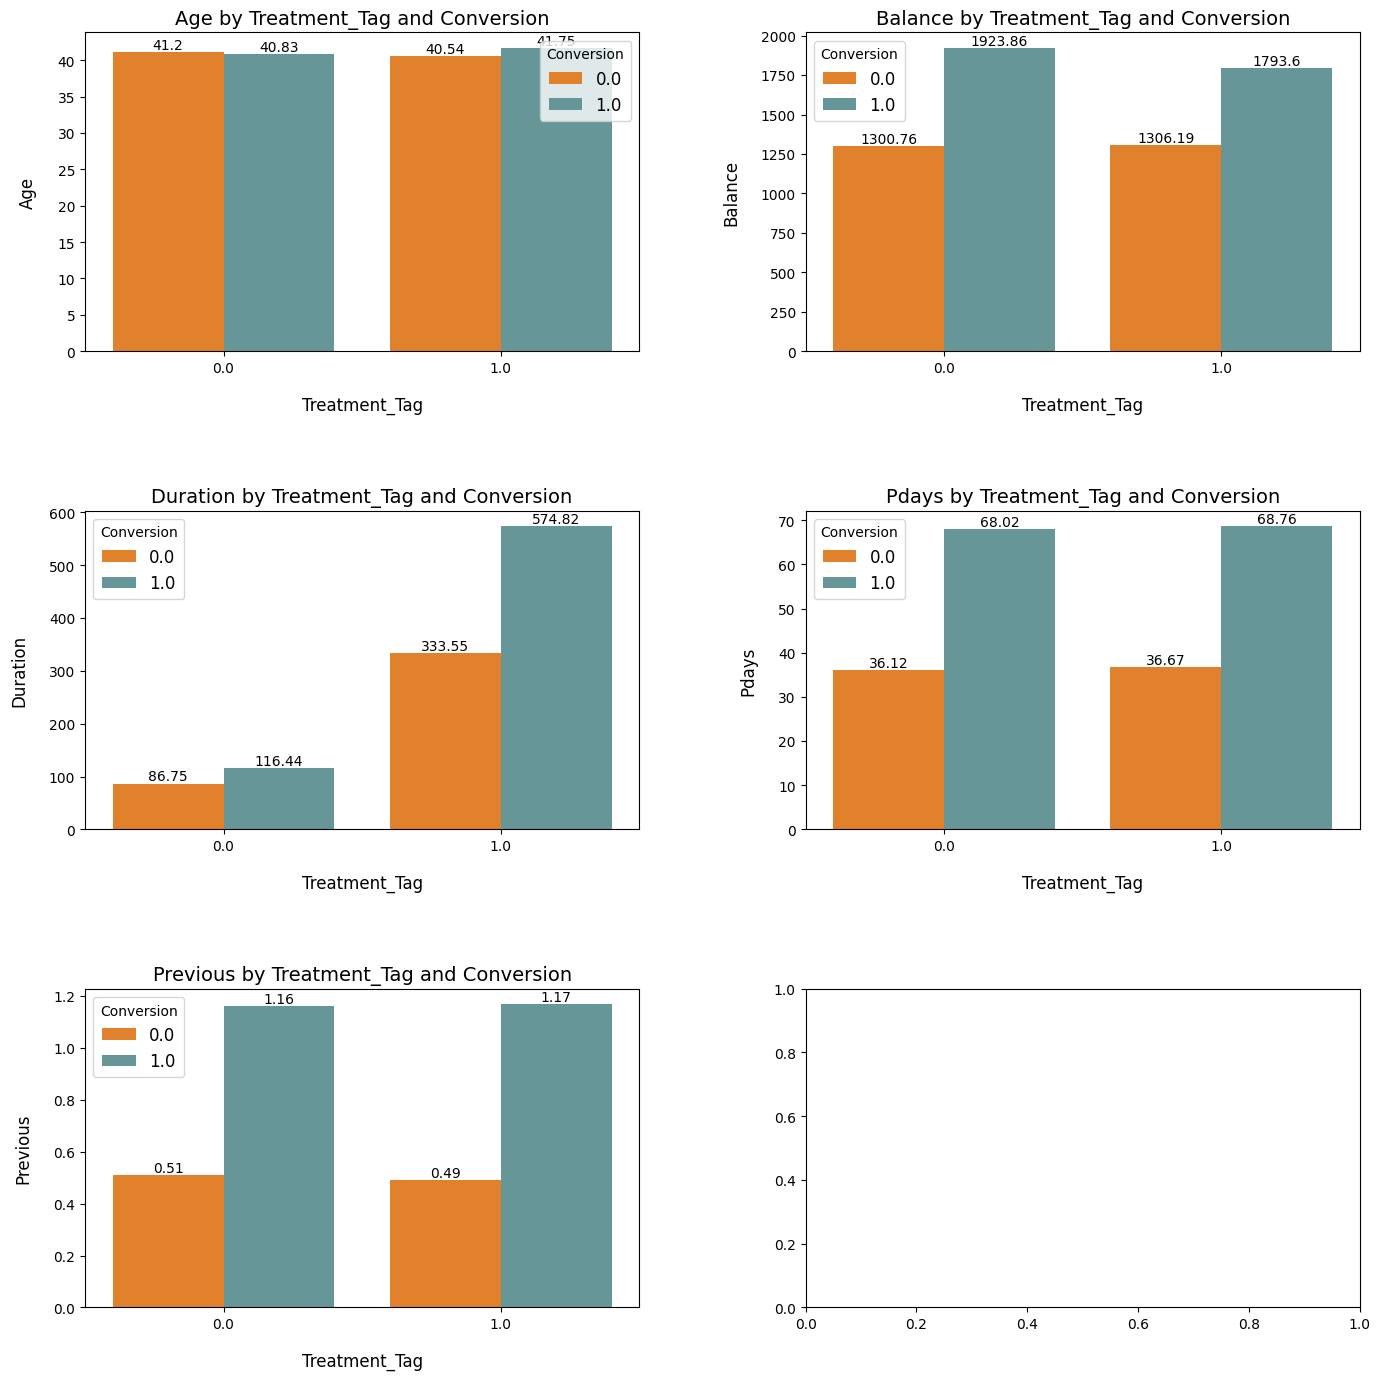

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_cols = ['age', 'balance', 'duration', 'pdays', 'previous']

# List of columns to group by
group_cols = ['treatment_tag', 'conversion']

# Number of columns per row
num_cols = 2

# Calculate number of rows needed
num_rows = len(numerical_cols) // num_cols + 1

# Create a grid plot with one plot for each numerical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over the numerical columns and create a plot for each
for i, col in enumerate(numerical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Group by treatment_tag, conversion, and the column and calculate mean
    grouped = data.groupby(group_cols)[col].mean().round(2).reset_index()
    
    # Create bar chart with mean values
    ax = sns.barplot(x=group_cols[0], y=col, hue=group_cols[1], data=grouped, ax=axs[row, col_idx], palette=['#ff7f0e', '#5f9ea0'])
    
    # Set title
    ax.set_title(f'{col.title()} by {group_cols[0].title()} and {group_cols[1].replace("_", " ").title()}', fontsize=14)
    
    # Set legend title
    legend_title = group_cols[1].replace('_', ' ').title()
    ax.legend(title=legend_title, fontsize=12)
    
    # Set x-axis label
    ax.set_xlabel(group_cols[0].title(), labelpad=15, fontsize=12)
    
    # Set y-axis label
    ax.set_ylabel(col.title(), labelpad=15, fontsize=12)
    
    # Add markers on the plot
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', fontsize=10)

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.95, hspace=0.5, wspace=0.3)

# Show the plot
plt.show()



#### Base Model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Split the data into training and test sets, stratifying by treatment and conversion
stratify_cols = pd.concat([data['treatment_tag'], data['conversion']], axis=1)
X_train, X_test, trmnt_train, trmnt_test, y_train, y_test = train_test_split(
    data, data['treatment_tag'], data['conversion'], stratify=stratify_cols, test_size=0.2, random_state=42)

# Filter the columns to keep only the relevant ones
numeric_features = [ 'balance', 'previous', 'pdays']
categorical_features = [ 'job', 'marital','education','default','housing','loan', 'contact', 'poutcome', 'month']
other_bins = ['age_0-25','age_25-35', 'age_35-50', 'age_50-100', 'days_0-7', 'days_7-14', 'days_14-21', 'days_21-31']

X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features ]

X_train_cat = pd.get_dummies(X_train[categorical_features])
X_test_cat = pd.get_dummies(X_test[categorical_features])

# create a list of columns to drop
columns_to_drop = [col for col in X_train_cat.columns if ('_unknown' in col or '_nonexistent' in col or '_other' in col)]

# drop the columns
X_traincat= X_train_cat.drop(columns_to_drop, axis=1)
X_testcat= X_test_cat.drop(columns_to_drop, axis=1)

X_train_other = X_train[other_bins]
X_test_other = X_test[other_bins]

X_train_2 = pd.concat([X_train_num, X_traincat, X_train_other ], axis=1)
X_test_2 = pd.concat([X_test_num, X_testcat,X_test_other ], axis=1)


# Scale the numeric features
scaler = StandardScaler()
X_train_2[numeric_features] = scaler.fit_transform(X_train_2[numeric_features])
X_test_2[numeric_features] = scaler.transform(X_test_2[numeric_features])

# Concatenate the feature names
categorical_feature_names = X_train_cat.columns
feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Print the final shapes of the training and test data
print(f"Train shape: {X_train_2.shape}")
print(f"Test shape: {X_test_2.shape}")



Train shape: (36168, 50)
Test shape: (9043, 50)


In [19]:
X_train_2.columns

Index(['balance', 'previous', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'age_0-25', 'age_25-35', 'age_35-50',
       'age_50-100', 'days_0-7', 'days_7-14', 'days_14-21', 'days_21-31'],
      dtype='object')

In [20]:
X_train_2.head()

,balance,previous,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_oct,month_sep,age_0-25,age_25-35,age_35-50,age_50-100,days_0-7,days_7-14,days_14-21,days_21-31
321,-0.313017,-0.242541,-0.410613,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9345,-0.445142,-0.242541,-0.410613,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6915,-0.389407,-0.242541,-0.410613,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
8093,-0.210070,-0.242541,-0.410613,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11682,-0.284493,-0.242541,-0.410613,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


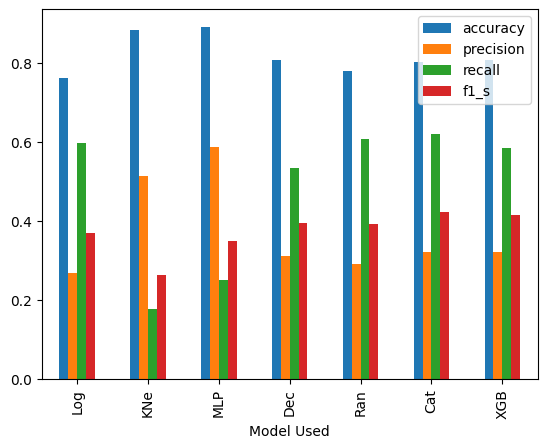

In [21]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

algo_list = [LogisticRegression(class_weight='balanced', max_iter=500),  
             KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
             MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000),
             DecisionTreeClassifier(max_depth=7, random_state=0,class_weight='balanced'),            
             RandomForestClassifier(max_depth=7, random_state=0, n_estimators=10,class_weight='balanced'),           
             CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()]),
             XGBClassifier(scale_pos_weight=1/y_train.mean())]
model_abbr = []

def model_test(X_train, X_test, y_train, y_test, algo_list):
    
    start_time = time()
    accuracy = []
    precision = []
    recall = []
    f1_s = []
    
    for each_model in algo_list:
          # Define model abbreviation
        abbr = each_model.__class__.__name__[:3]
        model_abbr.append(abbr)
        classifier = each_model.fit(X_train, y_train)
        pred = classifier.predict(X_test)

        acc = accuracy_score(y_test, pred)
        accuracy.append(acc)
        prec = precision_score(y_test, pred)
        precision.append(prec)
        rec = recall_score(y_test, pred)
        recall.append(rec)
        f1 = f1_score(y_test, pred)
        f1_s.append(f1)
        

        #print("%s = %.2f" % (each_model.__class__.__name__[:3], round(acc, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(prec, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(rec, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(f1, 2)))

    metrics_data = pd.DataFrame(zip(model_abbr, accuracy, precision, recall, f1_s), columns=['Model Used', 'accuracy', 'precision', 'recall', 'f1_s'])
        
    return metrics_data

results_df = model_test(X_train=X_train_2, X_test=X_test_2, y_train=y_train, y_test=y_test, algo_list=algo_list)

# create a plot of the results for each algorithm
results_df.plot(x='Model Used', y=['accuracy', 'precision', 'recall', 'f1_s'], kind='bar')
plt.show()

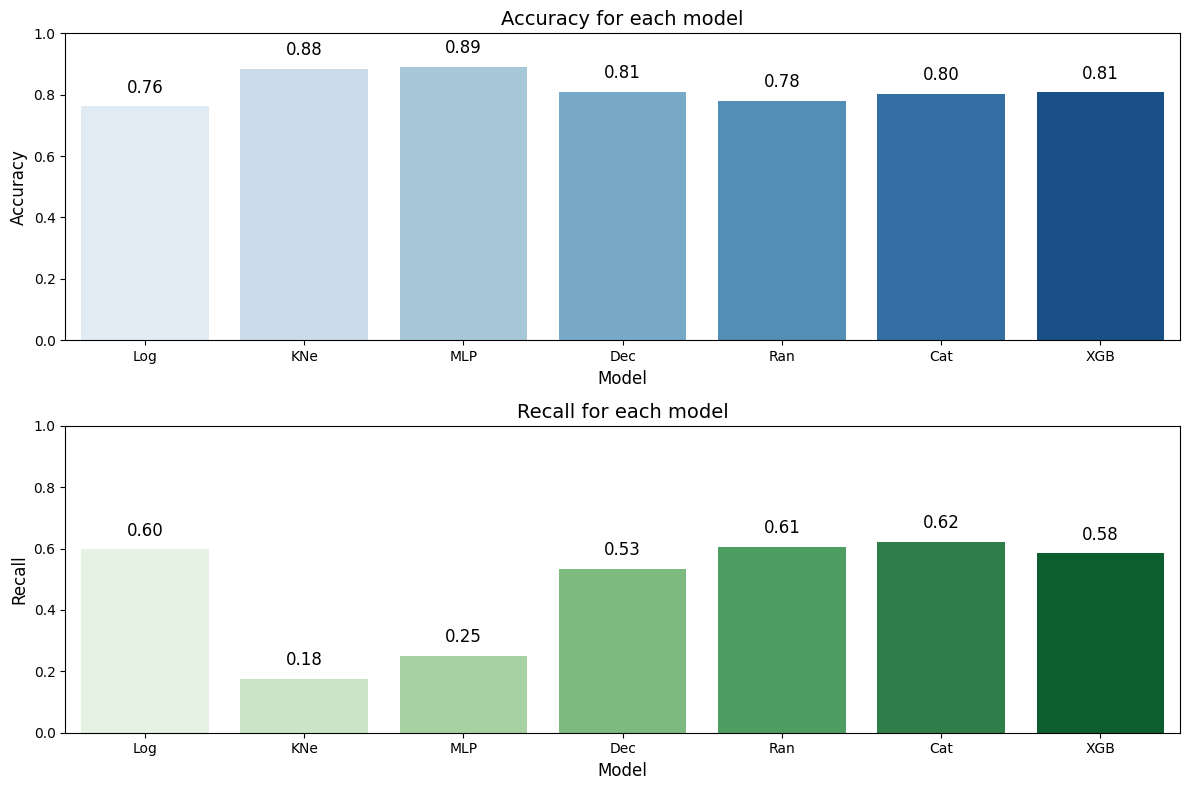

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with accuracy for each model
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
sns.barplot(x='Model Used', y="accuracy", data=results_df, ax=axs[0], palette='Blues')
axs[0].set_title("Accuracy for each model", fontsize=14)
axs[0].set_xlabel("Model", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
axs[0].set_ylim([0, 1])

# Add labeled markers for the accuracy scores
for i, score in enumerate(results_df['accuracy']):
    axs[0].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Create a bar plot with recall for each model
sns.barplot(x='Model Used', y="recall", data=results_df, ax=axs[1], palette='Greens')
axs[1].set_title("Recall for each model", fontsize=14)
axs[1].set_xlabel("Model", fontsize=12)
axs[1].set_ylabel("Recall", fontsize=12)
axs[1].set_ylim([0, 1])

# Add labeled markers for the recall scores
for i, score in enumerate(results_df['recall']):
    axs[1].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Adjust the spacing between the subplots and ensure that the legend does not overlap with the subplots
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [68]:
import mlflow 
# Define the models
algo_list = [
    LogisticRegression(class_weight='balanced', max_iter=500),
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                         weights='uniform'),
    MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=7, random_state=0, class_weight='balanced'),            
    RandomForestClassifier(max_depth=7, random_state=0, n_estimators=10, class_weight='balanced'),           
    CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()]),
    XGBClassifier(scale_pos_weight=1/y_train.mean())
]



def run_model(algo_list, X_train, X_test, y_train, y_test, random_state=42):
    
    # Define the hyperparameters for each model
    hyperparameters = {
    'LogisticRegression': [{'C': 0.1}, {'C': 1}, {'C': 10},{}],
    'KNeighborsClassifier': [{'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 10, 'weights': 'distance'}, {'n_neighbors': 20, 'weights': 'distance'},{}],
    'MLPClassifier': [{'alpha': 0.0001, 'hidden_layer_sizes': (5,)}, {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}, {'alpha': 0.0001, 'hidden_layer_sizes': (20,)},{}],
    'DecisionTreeClassifier': [{'max_depth': 5}, {'max_depth': 10}, {'max_depth': 15},{}],
    'RandomForestClassifier': [{'n_estimators': 5, 'max_depth': 5}, {'n_estimators': 10, 'max_depth': 10}, {'n_estimators': 100, 'max_depth': 15},{}],
    'CatBoostClassifier': [{'iterations': 50, 'learning_rate': 0.01}, {'iterations': 100, 'learning_rate': 0.05}, {'iterations': 200, 'learning_rate': 0.1} ,{}],
    'XGBClassifier': [{'max_depth': 5, 'learning_rate': 0.01}, {'max_depth': 10, 'learning_rate': 0.05}, {'max_depth': 15, 'learning_rate': 0.1} ,{}]
    }
    
    # Define an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
    
    # Loop over the models and hyperparameters and train and evaluate each model
    for i, each_model in enumerate(algo_list):
        # Define model abbreviation
        abbr = each_model.__class__.__name__[:4].lower()
        print(abbr)
        
        # Get the hyperparameters for the model
        hyperparams = hyperparameters[each_model.__class__.__name__]
        
        for j, params in enumerate(hyperparams):
            with mlflow.start_run():
                # Set the experiment name
                mlflow.set_experiment("Bank Campaign base case included ")
                
                # Log the model parameters
                mlflow.log_param("model", abbr)
                mlflow.log_param("hyperparameters", params)
                
                # Train and evaluate the model
                # Train and evaluate the model
                if abbr != 'catb':
                    classifier = each_model.set_params(**params).fit(X_train, y_train)
                else:
                    each_model.fit(X_train, y_train)

                pred = classifier.predict(X_test)
                acc = accuracy_score(y_test, pred)
                prec = precision_score(y_test, pred)
                rec = recall_score(y_test, pred)
                f1 = f1_score(y_test, pred)
                
                # Log the model performance metrics
                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("precision", prec)
                mlflow.log_metric("recall", rec)
                mlflow.log_metric("f1_score", f1)
                
                # Print the model performance metrics
                print(f"{abbr} with hyperparameters {params} - accuracy: {acc}, precision: {prec}, recall: {rec}, f1_score: {f1}")
                
                # Save the trained model
                mlflow.sklearn.log_model(classifier, f"model_{abbr}_hyperparams_{j}")

            # Add the results to the results dataframe
                results_df = results_df.append({'Model': abbr, 'Hyperparameters': params, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}, ignore_index=True)
    return results_df         

In [ ]:
results_df = run_model(algo_list, X_train_2, X_test_2, y_train, y_test, random_state=42)

2023/02/26 18:28:37 INFO mlflow.tracking.fluent: Experiment with name 'Bank Campaign base case included ' does not exist. Creating a new experiment.


logi
logi with hyperparameters {'C': 0.1} - accuracy: 0.7606988831140108, precision: 0.2678421494542401, recall: 0.6030245746691871, f1_score: 0.3709302325581395


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


logi with hyperparameters {'C': 1} - accuracy: 0.7618047108260533, precision: 0.2677966101694915, recall: 0.5973534971644613, f1_score: 0.3698069046225863


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


logi with hyperparameters {'C': 10} - accuracy: 0.7615835452836448, precision: 0.26756985605419137, recall: 0.5973534971644613, f1_score: 0.3695906432748538


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


logi with hyperparameters {} - accuracy: 0.7615835452836448, precision: 0.26756985605419137, recall: 0.5973534971644613, f1_score: 0.3695906432748538


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


knei


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


knei with hyperparameters {'n_neighbors': 5, 'weights': 'uniform'} - accuracy: 0.8841092557779497, precision: 0.5138121546961326, recall: 0.17580340264650285, f1_score: 0.2619718309859155


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


knei with hyperparameters {'n_neighbors': 10, 'weights': 'distance'} - accuracy: 0.8751520513104059, precision: 0.4172494172494173, recall: 0.16918714555765596, f1_score: 0.24075319435104237


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


knei with hyperparameters {'n_neighbors': 20, 'weights': 'distance'} - accuracy: 0.8805706070994139, precision: 0.46646341463414637, recall: 0.1446124763705104, f1_score: 0.2207792207792208


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


knei with hyperparameters {} - accuracy: 0.8805706070994139, precision: 0.46646341463414637, recall: 0.1446124763705104, f1_score: 0.2207792207792208


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


mlpc
mlpc with hyperparameters {'alpha': 0.0001, 'hidden_layer_sizes': (5,)} - accuracy: 0.8900807254229791, precision: 0.5796019900497512, recall: 0.22022684310018903, f1_score: 0.31917808219178084


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


mlpc with hyperparameters {'alpha': 0.0001, 'hidden_layer_sizes': (10,)} - accuracy: 0.8907442220502045, precision: 0.5770925110132159, recall: 0.24763705103969755, f1_score: 0.34656084656084657


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


mlpc with hyperparameters {'alpha': 0.0001, 'hidden_layer_sizes': (20,)} - accuracy: 0.8889748977109366, precision: 0.5579399141630901, recall: 0.24574669187145556, f1_score: 0.3412073490813648


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


mlpc with hyperparameters {} - accuracy: 0.8889748977109366, precision: 0.5579399141630901, recall: 0.24574669187145556, f1_score: 0.3412073490813648


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


deci
deci with hyperparameters {'max_depth': 5} - accuracy: 0.7977441114674334, precision: 0.29461907298881196, recall: 0.5226843100189036, f1_score: 0.3768313458262351


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


deci with hyperparameters {'max_depth': 10} - accuracy: 0.8311401083711157, precision: 0.3439787092481703, recall: 0.4886578449905482, f1_score: 0.40374853572823116


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


deci with hyperparameters {'max_depth': 15} - accuracy: 0.7999557668915183, precision: 0.28579577866514544, recall: 0.4735349716446125, f1_score: 0.35645677694770544


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


deci with hyperparameters {} - accuracy: 0.7999557668915183, precision: 0.28579577866514544, recall: 0.4735349716446125, f1_score: 0.35645677694770544


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


rand
rand with hyperparameters {'n_estimators': 5, 'max_depth': 5} - accuracy: 0.7715359946920269, precision: 0.26816927322907086, recall: 0.5510396975425331, f1_score: 0.3607673267326733


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


rand with hyperparameters {'n_estimators': 10, 'max_depth': 10} - accuracy: 0.8091341369014707, precision: 0.3208154506437768, recall: 0.5652173913043478, f1_score: 0.4093086926762491


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


rand with hyperparameters {'n_estimators': 100, 'max_depth': 15} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


rand with hyperparameters {} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


catb
catb with hyperparameters {'iterations': 50, 'learning_rate': 0.01} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


catb with hyperparameters {'iterations': 100, 'learning_rate': 0.05} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


catb with hyperparameters {'iterations': 200, 'learning_rate': 0.1} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


catb with hyperparameters {} - accuracy: 0.8540307420103947, precision: 0.3929738562091503, recall: 0.4546313799621928, f1_score: 0.4215600350569676


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


xgbc
xgbc with hyperparameters {'max_depth': 5, 'learning_rate': 0.01} - accuracy: 0.7349330974234214, precision: 0.24592030360531308, recall: 0.6124763705103969, f1_score: 0.35093419983753044


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


xgbc with hyperparameters {'max_depth': 10, 'learning_rate': 0.05} - accuracy: 0.8093553024438792, precision: 0.32, recall: 0.5595463137996219, f1_score: 0.40715268225584594


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


xgbc with hyperparameters {'max_depth': 15, 'learning_rate': 0.1} - accuracy: 0.845626451398872, precision: 0.3689922480620155, recall: 0.4499054820415879, f1_score: 0.4054514480408859


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


xgbc with hyperparameters {} - accuracy: 0.845626451398872, precision: 0.3689922480620155, recall: 0.4499054820415879, f1_score: 0.4054514480408859


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [91]:
import pandas as pd
# Step 1: Create a dictionary mapping each unique Model value to an integer index
model_to_index = {model: i+1 for i, model in enumerate(results_df['Model'].unique())}

# Step 2: Map the Model column to the corresponding integer indices
results_df['ModelIndex'] = results_df['Model'].map(model_to_index)

# Step 3: Assign the new column to the dataframe
results_df = results_df[['ModelIndex', 'Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1-score']]


In [102]:
results_df.head()

,ModelIndex,Model,Hyperparameters,Accuracy,Precision,Recall,F1-score
0,logi c1,logi,{'C': 0.1},0.760699,0.267842,0.603025,0.370930
1,logi c2,logi,{'C': 1},0.761805,0.267797,0.597353,0.369807
2,logi c3,logi,{'C': 10},0.761584,0.267570,0.597353,0.369591
3,logi c4,logi,{},0.761584,0.267570,0.597353,0.369591
4,knei c1,knei,"{'n_neighbors': 5, 'weights': 'uniform'}",0.884109,0.513812,0.175803,0.261972


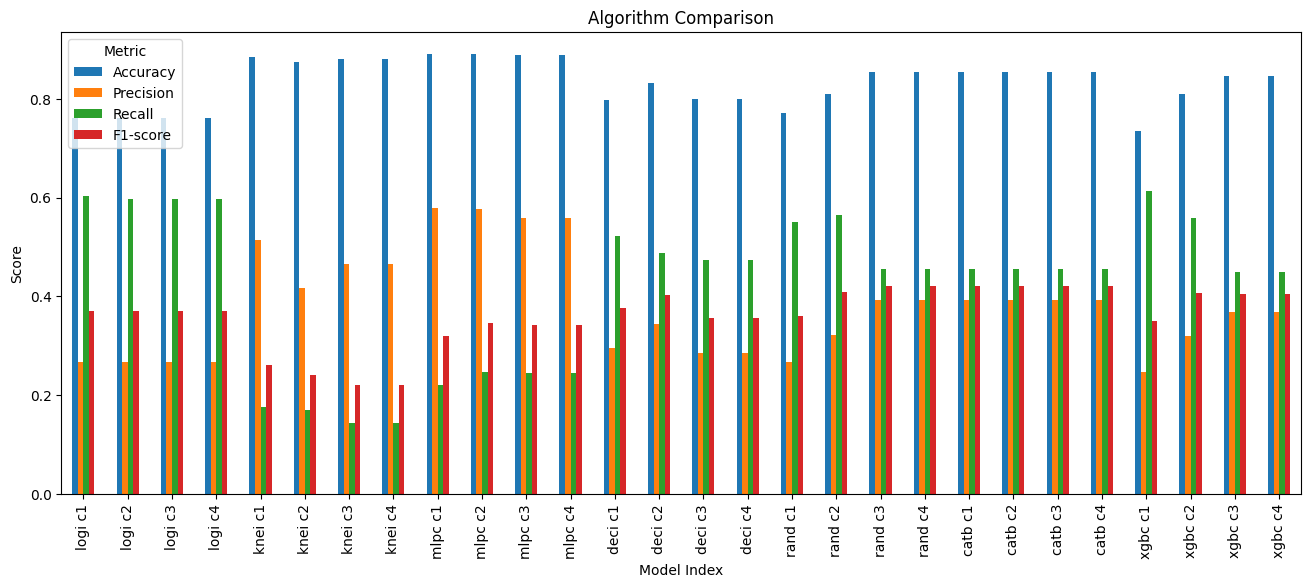

In [106]:
# Create a bar plot of the results for each algorithm
fig, ax = plt.subplots(figsize=(16, 6))
results_df.plot(x='ModelIndex', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', ax=ax)

# Customize the plot appearance
ax.set_xlabel('Model Index')
ax.set_ylabel('Score')
ax.set_title('Algorithm Comparison')
ax.legend(title='Metric', loc='upper left')

# Show the plot
plt.show()

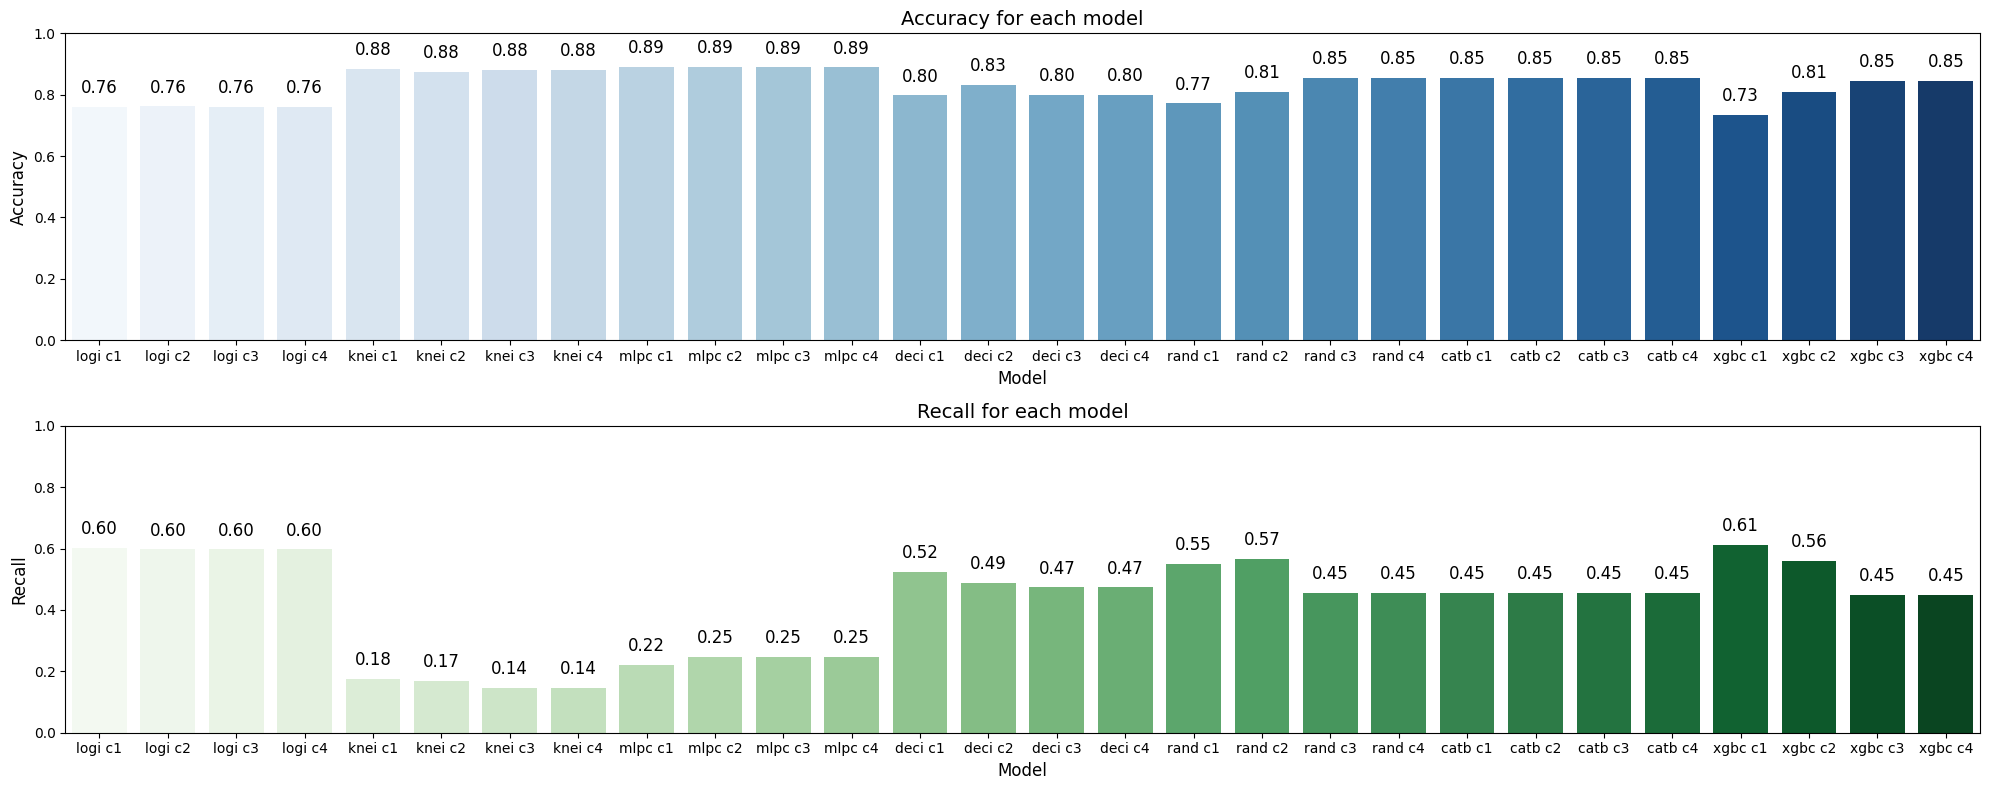

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with accuracy for each model
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
sns.barplot(x='ModelIndex', y="Accuracy", data=results_df, ax=axs[0], palette='Blues')
axs[0].set_title("Accuracy for each model", fontsize=14)
axs[0].set_xlabel("Model", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
axs[0].set_ylim([0, 1])

# Add labeled markers for the accuracy scores
for i, score in enumerate(results_df['Accuracy']):
    axs[0].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Create a bar plot with recall for each model
sns.barplot(x='ModelIndex', y="Recall", data=results_df, ax=axs[1], palette='Greens')
axs[1].set_title("Recall for each model", fontsize=14)
axs[1].set_xlabel("Model", fontsize=12)
axs[1].set_ylabel("Recall", fontsize=12)
axs[1].set_ylim([0, 1])

# Add labeled markers for the recall scores
for i, score in enumerate(results_df['Recall']):
    axs[1].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Adjust the spacing between the subplots and ensure that the legend does not overlap with the subplots
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [113]:
import mlflow

# Specify the experiment name
experiment_name = "Uplift Modeling run 2"

# Get the experiment ID
experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Query the runs in the experiment
runs = mlflow.search_runs(experiment_ids=experiment_id)

# Print the runs
pd.DataFrame(runs).head()


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_score,metrics.precision,metrics.accuracy,metrics.recall,...,params.alpha,params.hidden_layer_sizes,params.weights,params.n_neighbors,params.C,tags.mlflow.user,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name
0,c660d8f7491641638dfde9dbedf60ed9,412053636810445480,FINISHED,file:///Users/toyosibamidele/Group-By-Project-...,2023-02-26 23:07:27.892000+00:00,2023-02-26 23:07:34.366000+00:00,0.37093,0.267842,0.760699,0.603025,...,None,None,None,None,None,toyosibamidele,"[{""run_id"": ""c660d8f7491641638dfde9dbedf60ed9""...",LOCAL,nervous-mule-932,/Users/toyosibamidele/Library/Python/3.9/lib/p...
1,532822f835ce4e1eb7534b08631b1bf0,412053636810445480,FAILED,file:///Users/toyosibamidele/Group-By-Project-...,2023-02-26 22:59:20.066000+00:00,2023-02-26 22:59:20.101000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,None,toyosibamidele,None,LOCAL,catb_0,/Users/toyosibamidele/Library/Python/3.9/lib/p...
2,7627421072e7401dace77b5a25497a87,412053636810445480,FINISHED,file:///Users/toyosibamidele/Group-By-Project-...,2023-02-26 22:59:17.325000+00:00,2023-02-26 22:59:20.061000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,None,toyosibamidele,None,LOCAL,rand_2,/Users/toyosibamidele/Library/Python/3.9/lib/p...
3,7eaf69a3a9d54413bab478bb1048aadc,412053636810445480,FINISHED,file:///Users/toyosibamidele/Group-By-Project-...,2023-02-26 22:59:17.031000+00:00,2023-02-26 22:59:17.318000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,None,toyosibamidele,None,LOCAL,rand_1,/Users/toyosibamidele/Library/Python/3.9/lib/p...
4,1218884c9f6d4796a2c84eebd8ea62f0,412053636810445480,FINISHED,file:///Users/toyosibamidele/Group-By-Project-...,2023-02-26 22:59:16.890000+00:00,2023-02-26 22:59:17.025000+00:00,NaN,NaN,NaN,NaN,...,None,None,None,None,None,toyosibamidele,None,LOCAL,rand_0,/Users/toyosibamidele/Library/Python/3.9/lib/p...


In [ ]:
Uplift Modeling run 2

In [45]:
results_df

,Model,Hyperparameters,Accuracy,Precision,Recall,F1-score
0,logi,{'C': 0.1},0.760699,0.267842,0.603025,0.370930
1,logi,{'C': 1},0.761805,0.267797,0.597353,0.369807
2,logi,{'C': 10},0.761584,0.267570,0.597353,0.369591
3,knei,"{'n_neighbors': 5, 'weights': 'uniform'}",0.884109,0.513812,0.175803,0.261972
4,knei,"{'n_neighbors': 10, 'weights': 'distance'}",0.875152,0.417249,0.169187,0.240753
5,knei,"{'n_neighbors': 20, 'weights': 'distance'}",0.880571,0.466463,0.144612,0.220779
6,mlpc,"{'alpha': 0.0001, 'hidden_layer_sizes': (5,)}",0.890081,0.579602,0.220227,0.319178
7,mlpc,"{'alpha': 0.0001, 'hidden_layer_sizes': (10,)}",0.890744,0.577093,0.247637,0.346561
8,mlpc,"{'alpha': 0.0001, 'hidden_layer_sizes': (20,)}",0.888975,0.557940,0.245747,0.341207
9,deci,{'max_depth': 5},0.797744,0.294619,0.522684,0.376831


#### Feature Selection

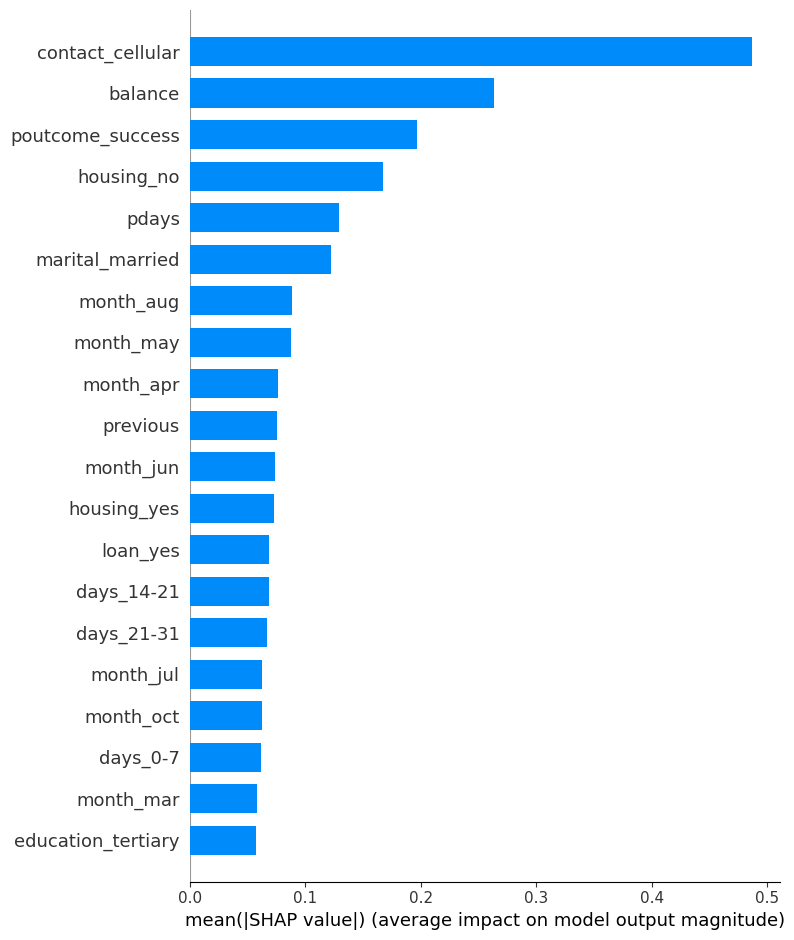

In [23]:
import shap 


# Create a CatBoostClassifier model
model = CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()])

# Train the model
model.fit(X_train_2, y_train)


# Generate SHAP values for the test set
explainer = shap.Explainer(model)
shap_values = explainer(X_test_2)
shap.summary_plot(shap_values, X_test_2, plot_type="bar")

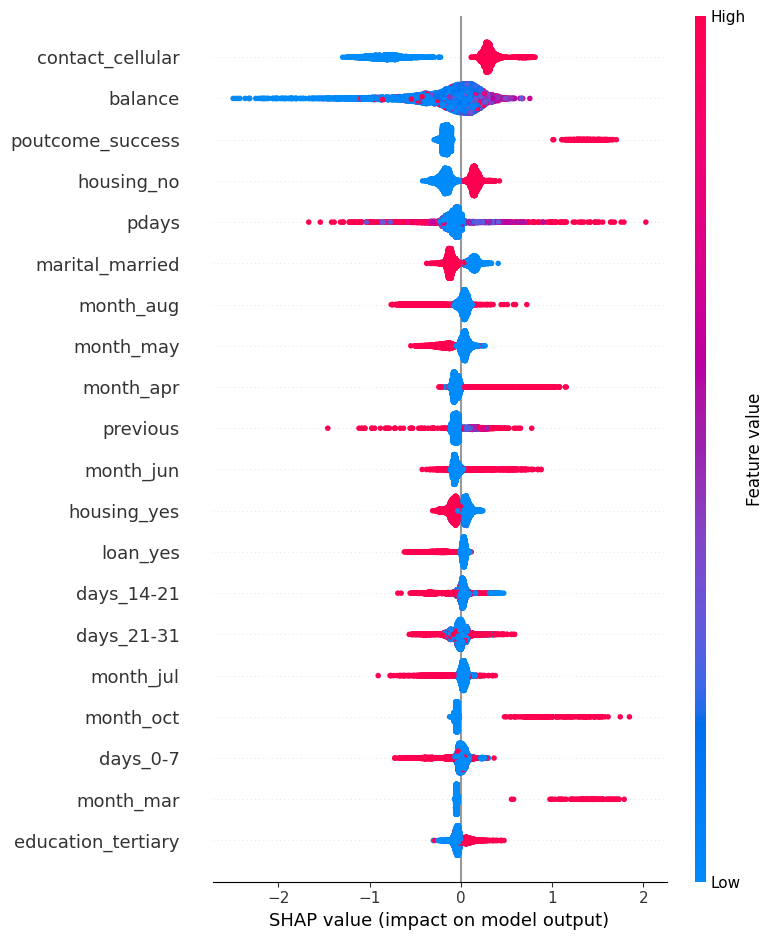

In [24]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_test_2)

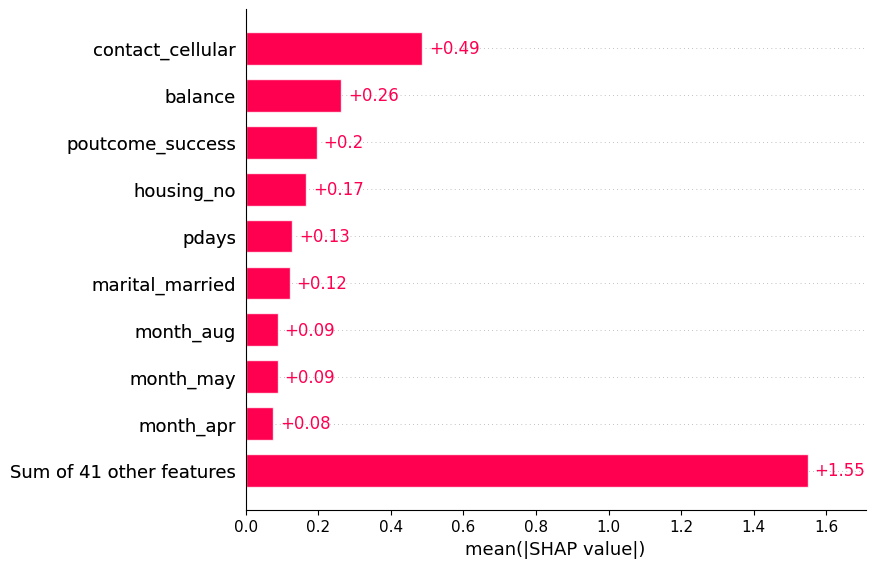

In [25]:
shap.plots.bar(shap_values, max_display=10)

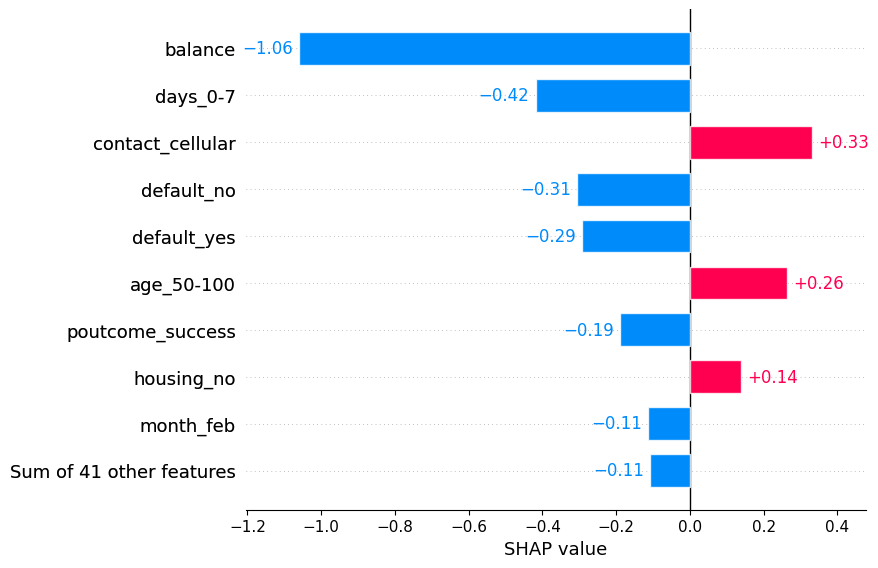

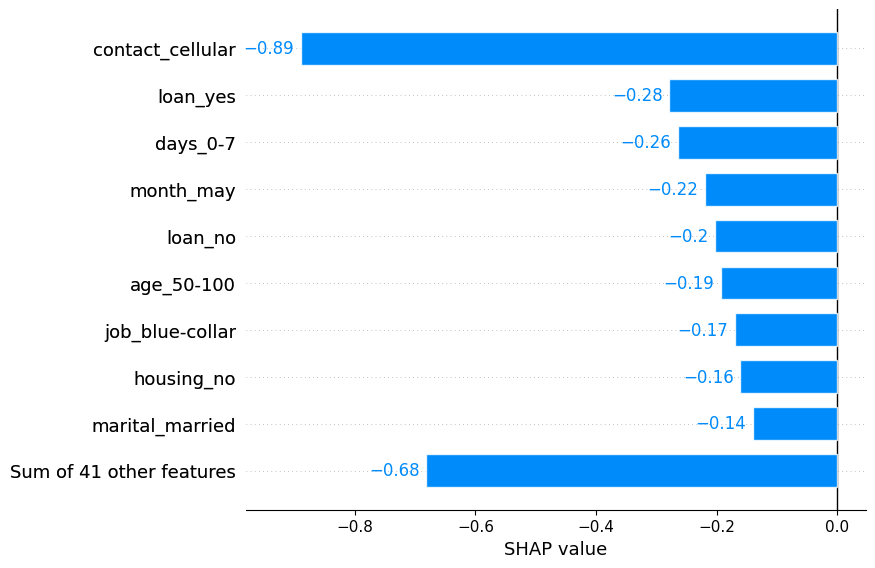

In [26]:
# Compute the SHAP values for the CatBoost model
explainer = shap.Explainer(model)
shap_values = explainer(X_test_2)

# Get the feature names
feature_names = X_test_2.columns

# Plot the top 10 features for each class
shap.plots.bar(shap_values[0], max_display=10) 
shap.plots.bar(shap_values[1], max_display=10)

# Show the plots
plt.show()


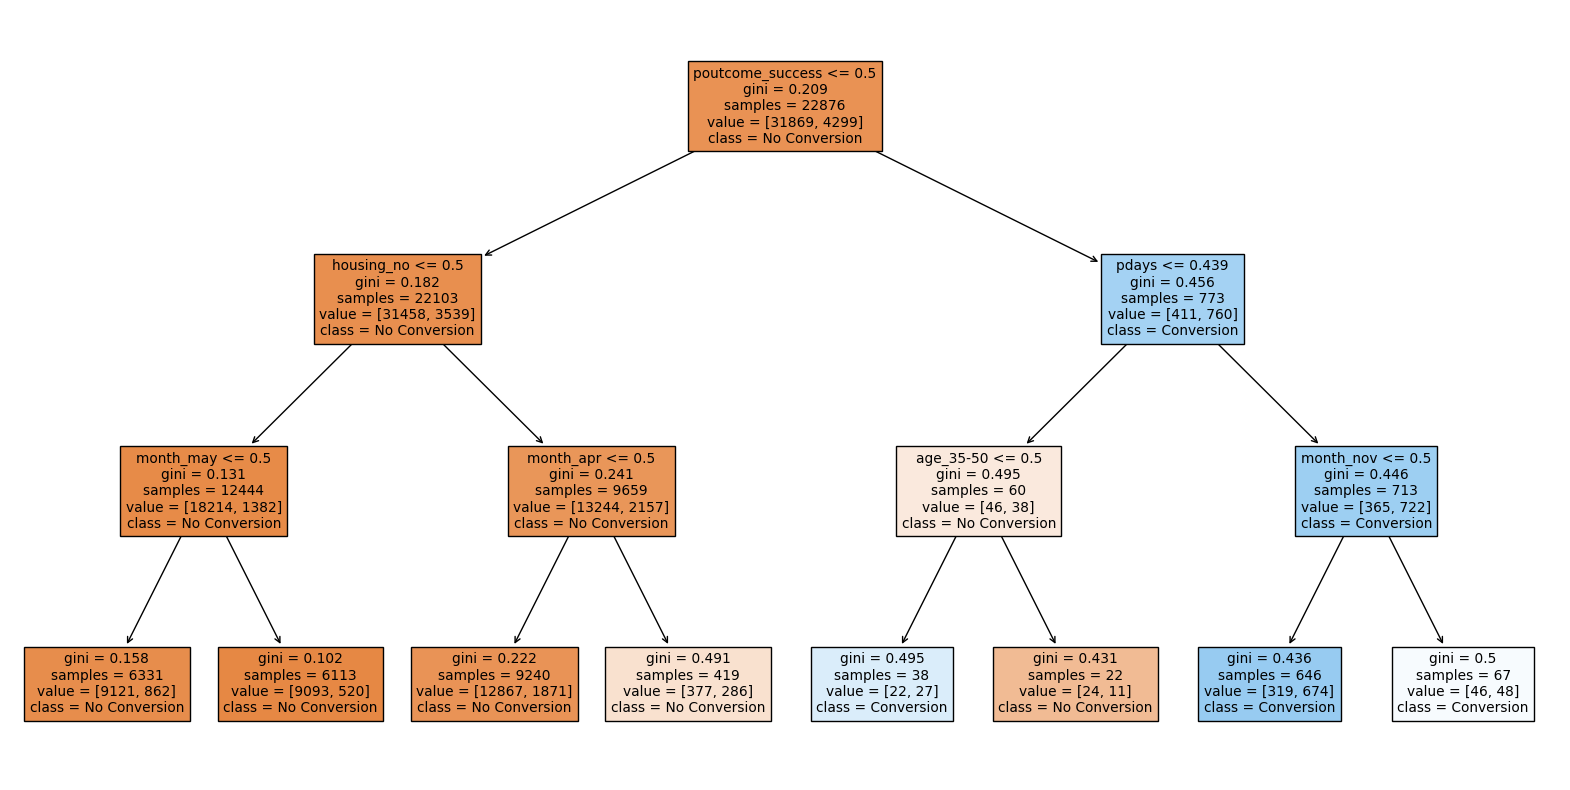

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Random Forest model
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(X_train_2, y_train)

# Select the tree to plot (e.g. the first tree)
tree_to_plot = 0

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[tree_to_plot], feature_names=X_train_2.columns, class_names=['No Conversion', 'Conversion'], filled=True)
plt.show()


In [129]:
data

,Model,Hyperparameters,ModelIndex,Accuracy,Precision,Recall,F1-score
0,logi,{'C': 0.1},1,0.760699,0.267842,0.603025,0.370930
1,logi,{'C': 1},1,0.761805,0.267797,0.597353,0.369807
2,logi,{'C': 10},1,0.761584,0.267570,0.597353,0.369591
3,logi,{},1,0.761584,0.267570,0.597353,0.369591
4,knei,"{'n_neighbors': 5, 'weights': 'uniform'}",2,0.884109,0.513812,0.175803,0.261972
5,knei,"{'n_neighbors': 10, 'weights': 'distance'}",2,0.875152,0.417249,0.169187,0.240753
6,knei,"{'n_neighbors': 20, 'weights': 'distance'}",2,0.880571,0.466463,0.144612,0.220779
7,knei,{},2,0.880571,0.466463,0.144612,0.220779
8,mlpc,"{'alpha': 0.0001, 'hidden_layer_sizes': (5,)}",3,0.890081,0.579602,0.220227,0.319178
9,mlpc,"{'alpha': 0.0001, 'hidden_layer_sizes': (10,)}",3,0.890744,0.577093,0.247637,0.346561
